In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import time

In [5]:
# d = yf.Ticker("^VIX").history(period="max")
# d.to_csv("VIX_historical.csv")

In [12]:
# table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# df = table[0]
# df.to_csv('S&P500-Info.csv')
# df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [13]:
sp500 = pd.read_csv("S&P500-Symbols.csv",index_col=0)

In [14]:
def rename_with_symbols(df, symbol):
    for col in df.columns:
        if '_' not in col:
            df.rename(columns={col: "{}_{}".format(col,symbol)}, inplace=True)
    return(None)

In [15]:
ticklist = list(sp500.iloc[:,0])
total_df = yf.Ticker(ticklist[0]).history(period="max")

rename_with_symbols(total_df, ticklist[0])

total_df.head() 

,Open_MMM,High_MMM,Low_MMM,Close_MMM,Volume_MMM,Dividends_MMM,Stock Splits_MMM
Date,,,,,,,
1970-01-02,0.42,0.42,0.42,0.42,72000,0.0,0.0
1970-01-05,0.42,0.42,0.42,0.42,446400,0.0,0.0
1970-01-06,0.42,0.42,0.42,0.42,176000,0.0,0.0
1970-01-07,0.42,0.43,0.42,0.43,164800,0.0,0.0
1970-01-08,0.43,0.43,0.43,0.43,304000,0.0,0.0


In [16]:
# for i,ticker in enumerate(ticklist[1:]):
#     ran = np.random.uniform(low=-1, high=1)*2
#     time.sleep(5+ran)

#     try:
#         new_df = yf.Ticker(ticker).history(period="max")
#         rename_with_symbols(new_df, ticker)
#         total_df = total_df.join(new_df, how='outer')
#     except:
#         print("failed {}".format(ticker))
#         next
        
#     if i%10 == 0:
#         print("{}% Gathered".format(i/len(ticklist)))
    
# total_df = total_df[[col for col in total_df.columns if 'Close' in col]]
    
# total_df.head()

0.0% Gathered
0.019801980198019802% Gathered
0.039603960396039604% Gathered
0.0594059405940594% Gathered
0.07920792079207921% Gathered
0.09900990099009901% Gathered
0.1188118811881188% Gathered
- BRK.B: No data found, symbol may be delisted
0.13861386138613863% Gathered
- BF.B: 1d data not available for startTime=-2208988800 and endTime=1587649275. Only 100 years worth of day granularity data are allowed to be fetched per request.
0.15841584158415842% Gathered
0.1782178217821782% Gathered
0.19801980198019803% Gathered
0.21782178217821782% Gathered
0.2376237623762376% Gathered
0.25742574257425743% Gathered
0.27722772277227725% Gathered
0.297029702970297% Gathered
0.31683168316831684% Gathered
0.33663366336633666% Gathered
0.3564356435643564% Gathered
0.37623762376237624% Gathered
0.39603960396039606% Gathered
0.4158415841584158% Gathered
0.43564356435643564% Gathered
0.45544554455445546% Gathered
0.4752475247524752% Gathered
0.49504950495049505% Gathered
0.5148514851485149% Gathered
0.5

,Close_MMM,Close_ABT,Close_ABBV,Close_ABMD,Close_ACN,Close_ATVI,Close_ADBE,Close_AMD,Close_AAP,Close_AES,...,Close_WYNN,Close_XEL,Close_XRX,Close_XLNX,Close_XYL,Close_YUM,Close_ZBRA,Close_ZBH,Close_ZION,Close_ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
total_df.to_csv("sp500_individual_prices.csv")

In [18]:
returns_df = total_df.copy(deep=True)
for ticker in ticklist[:]:
    today = returns_df["Close_{}".format(ticker)]
    yesterday = returns_df["Close_{}".format(ticker)].shift(1, axis=0)
    returns_df[ticker] = (today-yesterday)/yesterday*100
returns_df = returns_df[ticklist[:]]
returns_df.to_csv("sp500_individual_returns.csv")

In [19]:
returns_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
returns_df.tail()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-20,-1.904957,2.072701,0.647094,0.108421,-0.199897,-0.568182,0.223766,0.653710,-2.910988,-3.201220,...,-6.589345,-4.169769,-1.600442,0.089888,-0.474206,-2.494951,-0.310375,-1.332434,0.653370,-2.547430
2020-04-21,-1.419921,-4.030612,-4.321943,-1.022864,-4.864370,-1.172932,-4.607400,-7.109005,-1.637782,-1.889764,...,-3.943239,-1.460761,-5.945036,-3.098339,-1.703725,-1.060071,-4.694836,-4.153846,-2.118210,-2.111626
2020-04-22,1.398009,1.520468,1.381284,1.355623,3.651347,1.917225,2.364814,5.668934,-0.431680,1.765650,...,-0.525568,3.012143,1.908169,4.958295,1.615746,6.884236,3.401607,-2.568218,0.872600,0.890136
2020-04-23,1.072349,1.550063,1.509758,0.959635,0.795079,-0.014930,0.097990,1.537911,0.707839,1.182965,...,8.453520,-0.765462,1.521358,-3.686534,0.780572,-0.472405,3.465222,3.514552,2.871972,-0.214609
2020-04-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
import pandas as pd
pdf = pd.read_csv("sp500_individual_prices.csv", index_col=0)
rdf = pd.read_csv("sp500_individual_returns.csv", index_col=0)

In [7]:
for col in pdf.columns:
    pdf.rename(columns={col: col[6:]}, inplace=True)
    
pdf.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
plist = pdf.columns
rlist = rdf.columns
[item for item in plist if item not in rlist]

['ose_BRK.B', 'ose_BF.B']

In [11]:
pdf = pdf[rlist]
pdf.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pdf.to_csv("sp500_individual_prices_505.csv")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm

In [46]:
s = 1000000
norm = np.random.normal(5,1,size=s)
#skew = skewnorm.rvs(4,size=s)-np.mean(skewnorm.rvs(10,size=s))
skew = (norm**3)/10
skewneg = -1*skew
same_var_norm = np.random.normal(0,np.std(skew),size=s)

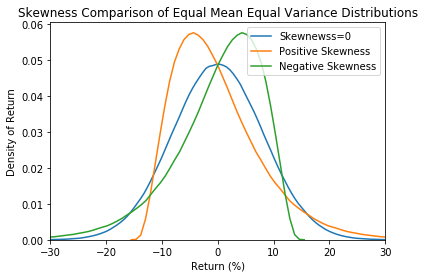

In [58]:
sns.distplot(same_var_norm, hist = False, kde = True, label="Skewnewss=0")
sns.distplot(skew-np.mean(skew), hist = False, kde = True, label="Positive Skewness")
sns.distplot(skewneg-np.mean(skewneg), hist=False, kde=True, label = "Negative Skewness")
plt.xlabel("Return (%)")
plt.ylabel("Density of Return")
plt.title("Skewness Comparison of Equal Mean Equal Variance Distributions")
plt.legend()
plt.xlim(-30, 30)
plt.savefig("skewdists.png")

In [74]:
print(np.mean(norm))
print(np.mean(skew))

0.0002789748044476927
-0.02017232774655429


In [75]:
print(np.std(norm))
print(np.std(skew))

0.9992860103754176
0.632445146726512
